<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [6]:
pip install --upgrade seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 32.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from  matplotlib.ticker import FuncFormatter

Load the dataset into a dataframe.


In [31]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


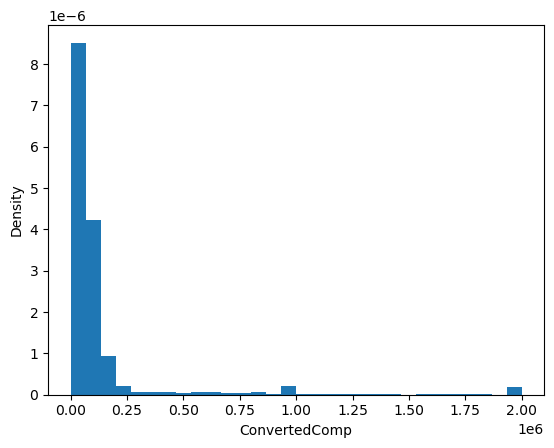

In [18]:
# Create the plot using Matplotlib
plt.hist(df['ConvertedComp'], bins=30, density=True)
plt.xlabel('ConvertedComp')
plt.ylabel('Density')

# Display the plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


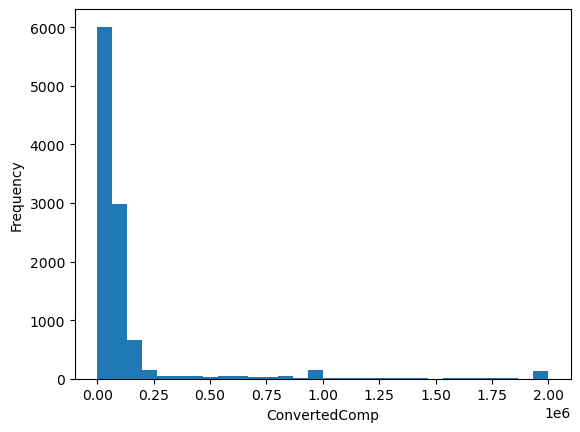

In [19]:
# Create the plot using Matplotlib
plt.hist(df['ConvertedComp'], bins=30)
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')

# Display the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [20]:
# find median of ConvertedComp
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [25]:
# your code goes here
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [ ]:
# df.groupby('Gender')["ConvertedComp"].median()
# df_woman_new = df_woman["ConvertedComp"].dropna(axis = 0)

In [26]:
df_woman= df[df["Gender"]=="Woman"]
df_woman["ConvertedComp"].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


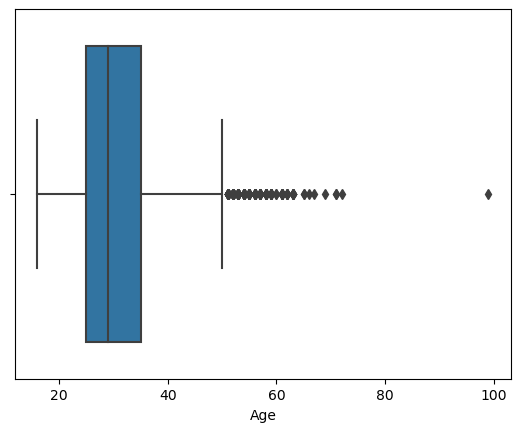

In [34]:
# Calculate the five-number summary for Age
# Create a box plot of Age using Seaborn
sns.boxplot(x=df['Age'])

# Display the plot
plt.show()


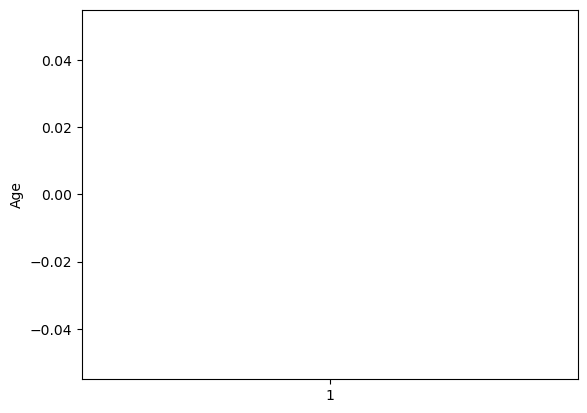

Minimum age: 16.0
First quartile: 25.0
Median: 29.0
Third quartile: 35.0
Maximum age: 99.0


In [35]:
# Calculate the five-number summary for Age
age_summary = df['Age'].describe()

# Create a box plot of Age
plt.boxplot(df['Age'])
plt.ylabel('Age')

# Display the plot
plt.show()

# Print the five-number summary
print('Minimum age:', age_summary['min'])
print('First quartile:', age_summary['25%'])
print('Median:', age_summary['50%'])
print('Third quartile:', age_summary['75%'])
print('Maximum age:', age_summary['max'])

In [36]:
# Calculate the median age of survey respondents
median_age = df['Age'].median()

# Print the result
print("Median age of survey respondents:", median_age)


Median age of survey respondents: 29.0


Plot a histogram of the column `Age`.


(array([2.094e+03, 5.337e+03, 2.557e+03, 8.420e+02, 2.250e+02, 4.900e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

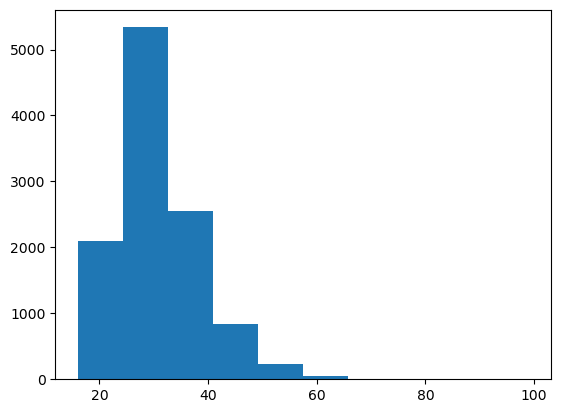

In [33]:
# your code goes here
# sns.displot(df["Age"])
plt.hist(df["Age"])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


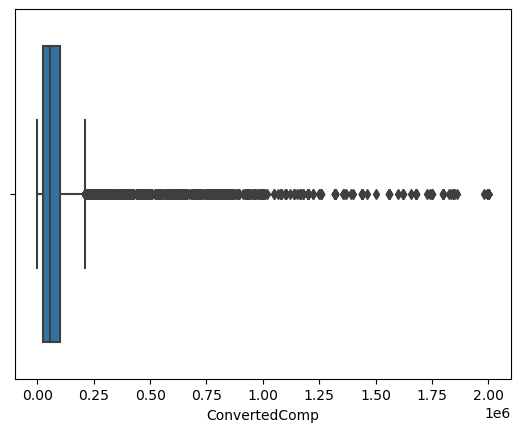

In [37]:
# Create a box plot of ConvertedComp using Seaborn
sns.boxplot(x=df['ConvertedComp'])

# Display the plot
plt.show()

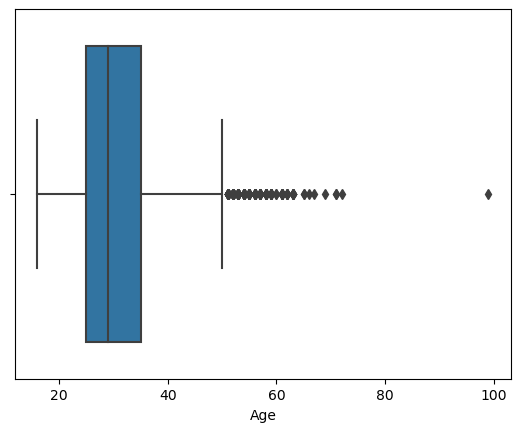

In [50]:
# Create a box plot of Age using Seaborn
sns.boxplot(x=df['Age'])

# Display the plot
plt.show()

In [51]:
# Calculate the first and third quartiles of the ConvertedComp column
Q2 = df['Age'].quantile(0.25)
Q4 = df['Age'].quantile(0.75)

# Calculate the interquartile range of the ConvertedComp column
IQRR = Q4 - Q2

# Print the result
print("Interquartile range of ConvertedComp:", IQR)

Interquartile range of ConvertedComp: 73132.0


In [52]:
# Calculate the upper and lower bounds for outliers
age_upper_bound = Q4 + 1.5*IQRR
age_lower_bound = Q2 - 1.5*IQRR

# Print the result
print("Upper bound for outliers:", age_upper_bound)
print("Lower bound for outliers:", age_lower_bound)

Upper bound for outliers: 50.0
Lower bound for outliers: 10.0


In [46]:
#median ConvertedComp before removing outliers
df['ConvertedComp'].median()

57745.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [38]:
# Calculate the first and third quartiles of the ConvertedComp column
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range of the ConvertedComp column
IQR = Q3 - Q1

# Print the result
print("Interquartile range of ConvertedComp:", IQR)

Interquartile range of ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [39]:
# Calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Print the result
print("Upper bound for outliers:", upper_bound)
print("Lower bound for outliers:", lower_bound)

Upper bound for outliers: 209698.0
Lower bound for outliers: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [40]:
# Count the number of outliers in the ConvertedComp column
num_outliers = len(df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)])

# Print the result
print("Number of outliers in ConvertedComp column:", num_outliers)

Number of outliers in ConvertedComp column: 879


In [44]:
#show original shape of df
df.shape

(11398, 85)

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [43]:
# Create a new DataFrame with outliers removed
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# show the shape after change
df_no_outliers.shape

(9703, 85)

In [48]:
#median ConvertedComp after removing outliers
df_no_outliers['ConvertedComp'].median()

52704.0

In [49]:
#mean ConvertedComp after removing outliers
df_no_outliers['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [53]:
# your code goes here
pd.DataFrame(df.corr()["Age"])

,Age
Respondent,0.004041
CompTotal,0.006970
ConvertedComp,0.105386
WorkWeekHrs,0.036518
CodeRevHrs,-0.020469
Age,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
